#### Name : Rashmi Nagpal
#### Course Name : Applied Machine Learning

##### Importing Libraries

In [90]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import  ElasticNet
from sklearn.linear_model import  Ridge
from sklearn.model_selection import cross_val_score
import  statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import  Lasso
from sklearn.model_selection import GridSearchCV
import matplotlib
from sklearn.decomposition import  PCA
from sklearn.cluster import  KMeans
import tarfile
from six.moves import urllib
%matplotlib inline

In [2]:
source_path = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz"

In [3]:
local_path = os.path.join("datasets", "housing")
os.makedirs(local_path, exist_ok=True)


In [4]:
tgz_path = os.path.join(local_path, "housing.tgz")
urllib.request.urlretrieve(source_path, tgz_path)
housing_tgz = tarfile.open(tgz_path)
housing_tgz.extractall(path=local_path)
housing_tgz.close()

In [5]:
# Read the data into a dataframe
import pandas as pd
csv_path = os.path.join(local_path, "housing.csv")
data = pd.read_csv(csv_path)

In [6]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


##### Missing values

In [7]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
#statistics of missing values column
data['total_bedrooms'].describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

##### Select 200 rows from dataset

In [132]:
random_subset = data.sample(n=200)

In [133]:
random_subset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15910,-122.42,37.74,52.0,1271.0,353.0,1076.0,324.0,2.9911,263900.0,NEAR BAY
2855,-118.92,35.38,33.0,3122.0,579.0,1733.0,545.0,3.8307,70600.0,INLAND
17407,-120.45,34.94,24.0,1702.0,447.0,1240.0,417.0,2.4091,115500.0,<1H OCEAN
3074,-119.24,35.77,28.0,1737.0,521.0,1764.0,514.0,1.7813,67800.0,INLAND
13216,-117.73,34.01,36.0,2340.0,392.0,1213.0,388.0,4.1250,213000.0,INLAND


##### Randomly select 30% values of 'total_rows' column and place 0 at their position

In [134]:
import random
ix = [(row, col) for row in range(random_subset.shape[0]) for col in range(random_subset.shape[1])]
for row, col in random.sample(ix, int(round(.3*len(ix)))):
    if col == 3:
        random_subset.iat[row, col] = 0

In [135]:
random_subset.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17449,-120.46,34.74,15.0,2185.0,386.0,827.0,336.0,5.3765,223100.0,NEAR OCEAN
20196,-119.21,34.26,23.0,2887.0,540.0,1508.0,518.0,3.3452,217600.0,NEAR OCEAN
6810,-118.10,34.10,34.0,0.0,645.0,1628.0,617.0,2.3400,210900.0,<1H OCEAN
4256,-118.35,34.10,18.0,0.0,1301.0,2103.0,1116.0,2.3250,250000.0,<1H OCEAN
16116,-122.50,37.74,44.0,2082.0,470.0,1154.0,403.0,4.3611,268100.0,NEAR OCEAN


##### Part A

##### Drop the patterns (rows) with the missing values

In [136]:
random_subset.dropna().head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15910,-122.42,37.74,52.0,0.0,353.0,1076.0,324.0,2.9911,263900.0,NEAR BAY
2855,-118.92,35.38,33.0,3122.0,579.0,1733.0,545.0,3.8307,70600.0,INLAND
17407,-120.45,34.94,24.0,1702.0,447.0,1240.0,417.0,2.4091,115500.0,<1H OCEAN
3074,-119.24,35.77,28.0,1737.0,521.0,1764.0,514.0,1.7813,67800.0,INLAND
13216,-117.73,34.01,36.0,2340.0,392.0,1213.0,388.0,4.1250,213000.0,INLAND


##### Find the most correlated featture to the feature with missing values and use regression to fill in the missing values

In [137]:
random_subset = random_subset.drop(columns = ['ocean_proximity'])

In [143]:
random_subset = random_subset.dropna()

In [144]:
y = random_subset.total_bedrooms

In [147]:
X = random_subset.drop(columns = ['total_bedrooms'])

In [140]:
from sklearn.neighbors import KNeighborsRegressor
clf =  KNeighborsRegressor(n_neighbors=10)

In [148]:
clf.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [ ]:
pred = clf.predict(random_subset.drop(columns = ['total_bedrooms']))

In [151]:
pred

array([450.4, 365.4, 545.3, 362.7, 477.3, 498.6, 519.1, 588.6, 537.2,
       646.7, 514.7, 365.4, 574.8, 417.6, 557.8, 533.2, 468.1, 688.7,
       418.3, 362.2, 588.6, 431.8, 574.8, 382.7, 374.8, 452.9, 431.8,
       533.2, 369. , 661. , 369. , 798.7, 460.3, 351.4, 519.1, 557.9,
       843.2, 431.8, 619.7, 430.1, 406.8, 779.5, 505.6, 409.3, 506.8,
       557.5, 547.8, 557.7, 548. , 514.6, 431.8, 543.9, 405.7, 543.5,
       400.8, 443.9, 549.6, 440.9, 477.3, 431.8, 516.3, 423.4, 338.4,
       533.2, 655.4, 362.2, 298.5, 362.7, 443.5, 600.9, 499.9, 298.5,
       534.5, 395.3, 453.1, 431.8, 355.3, 382.7, 481.5, 654.8, 409.3,
       392.5, 365.4, 527.5, 369. , 351.4, 628.7, 481.5, 460.3, 514.6,
       506.8, 440.9, 365.3, 383.4, 676.1, 490.8, 384.6, 552.2, 474. ,
       412.4, 417.6, 368.9, 453.1, 259.5, 619.7, 412.4, 608.3, 608.3,
       453.7, 628.5, 452.9, 466.3, 557.7, 556. , 492.2, 481.5, 543.9,
       450.4, 533.2, 515.5, 448.4, 600.9, 450.4, 306.5, 485.9, 338.4,
       537.2, 514.6,

##### Fill missing values with mean column values

In [99]:
random_subset.fillna(random_subset.mean(), inplace=True)

In [100]:
random_subset.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19924,-119.33,36.32,20.0,2025.0,328.0,1039.0,346.0,3.5313,82800.0,INLAND
11831,-120.58,39.27,15.0,4126.0,903.0,723.0,266.0,3.0147,118800.0,INLAND
7273,-118.24,33.99,28.0,312.0,89.0,498.0,87.0,2.4107,96400.0,<1H OCEAN
7400,-118.24,33.96,34.0,946.0,254.0,1101.0,239.0,1.7396,105900.0,<1H OCEAN
1414,-122.09,37.95,32.0,1339.0,209.0,601.0,209.0,6.0265,247900.0,NEAR BAY


##### Fill in the missing values with the average value of the k nearest patterns

In [78]:
from fancyimpute import KNN 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values=0, strategy="mean", axis=0)
random_subset["total_rooms"] = imp.fit_transform(random_subset[["total_rooms"]]).ravel()

/Users/rashminagpal/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [87]:
! pip install -U scikit-learn 

     |████████████████████████████████| 11.0MB 642kB/s eta 0:00:01    |██████████████▋                 | 5.0MB 638kB/s eta 0:00:10     |████████████████                | 5.5MB 639kB/s eta 0:00:09
  Found existing installation: scikit-learn 0.21.2
    Uninstalling scikit-learn-0.21.2:
      Successfully uninstalled scikit-learn-0.21.2


In [92]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit_transform(random_subset)

ImportError: cannot import name 'KNNImputer' from 'sklearn.impute' (/Users/rashminagpal/anaconda3/lib/python3.7/site-packages/sklearn/impute/__init__.py)

In [79]:
random_subset.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16901,-122.34,37.58,50.0,2784.000000,743.0,1622.0,698.0,3.8413,372200.0,NEAR OCEAN
5920,-118.45,34.28,36.0,2602.000000,638.0,2780.0,620.0,2.7155,149800.0,<1H OCEAN
2774,-115.80,33.26,2.0,96.000000,18.0,30.0,16.0,5.3374,47500.0,INLAND
9207,-119.85,37.10,8.0,2648.388889,168.0,413.0,146.0,3.3750,80700.0,INLAND
10764,-117.91,33.63,20.0,2648.388889,1526.0,1427.0,977.0,3.1985,106300.0,<1H OCEAN


In [94]:
def knn_impute(target, attributes, k_neighbors, aggregation_method="mean", numeric_distance="euclidean",
categorical_distance="jaccard", missing_neighbors_threshold = 0.5):
    
# Get useful variables
    possible_aggregation_method = ["mean", "median", "mode"]
    number_observations = len(target)
    is_target_numeric = all(isinstance(n, numbers.Number) for n in target)
    # Check for possible errors
    if number_observations < 3:
        print("Not enough observations.")
        return None
    if attributes.shape[0] != number_observations:
        print("The number of observations in the attributes variable is not matching the target variable length.")
        return None
    if k_neighbors > number_observations or k_neighbors < 1:
        print("The range of the number of neighbors is incorrect.")
        return None
    if aggregation_method not in possible_aggregation_method:
        print("The aggregation method is incorrect.")
        return None
    if not is_target_numeric and aggregation_method != "mode":
        print("The only method allowed for categorical target variable is the mode.")
        return None
    # Make sure the data are in the right format
    target = pd.DataFrame(target)
    attributes = pd.DataFrame(attributes)
    # Get the distance matrix and check whether no error was triggered when computing it
    distances = distance_matrix(attributes, numeric_distance, categorical_distance)
    if distances is None:
        return None
    # Get the closest points and compute the correct aggregation method
    for i, value in enumerate(target.iloc[:, 0]):
        if pd.isnull(value):
            order = distances.iloc[i,:].values.argsort()[:k_neighbors]
            closest_to_target = target.iloc[order, :]
            missing_neighbors = [x for x  in closest_to_target.isnull().iloc[:, 0]]
    # Compute the right aggregation method if at least more than 50% of the closest neighbors are not missing
        if sum(missing_neighbors) >= missing_neighbors_threshold * k_neighbors:
            continue
        elif aggregation_method == "mean":
            target.iloc[i] = np.ma.mean(np.ma.masked_array(closest_to_target,np.isnan(closest_to_target)))
        elif aggregation_method == "median":
            target.iloc[i] = np.ma.median(np.ma.masked_array(closest_to_target,np.isnan(closest_to_target)))
        else:
            target.iloc[i] = stats.mode(closest_to_target, nan_policy='omit')[0][0]
    return target

#### We will calculate the median for total_bedrooms based  upon categories of ocean_proximity column

In [ ]:
def calc_categorical_median(x):
    """this function fill the missing values of total_bedrooms based upon categories of ocean_proximity"""
    unique_colums_ocean_proximity=x['ocean_proximity'].unique()
    for i in unique_colums_ocean_proximity:
        median=x[x['ocean_proximity']==i]['total_bedrooms'].median()
        x.loc[x['ocean_proximity']==i,'total_bedrooms'] =  x[x['ocean_proximity']==i]['total_bedrooms'].fillna(median)
calc_categorical_median(df)

##### Correlation matrix

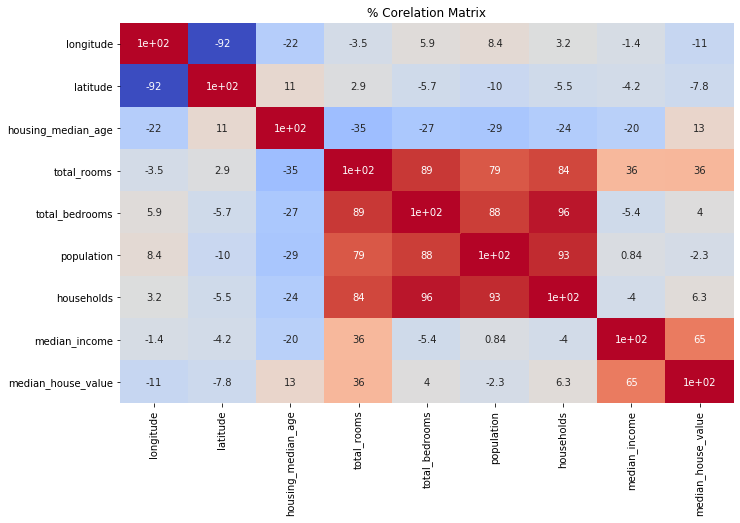

In [27]:

plt.figure(figsize=(11,7))
sns.heatmap(cbar=False,annot=True,data=random_subset.corr()*100,cmap='coolwarm')
plt.title('% Corelation Matrix')
plt.show()

##### barplot on ocean_proximity categories

[]

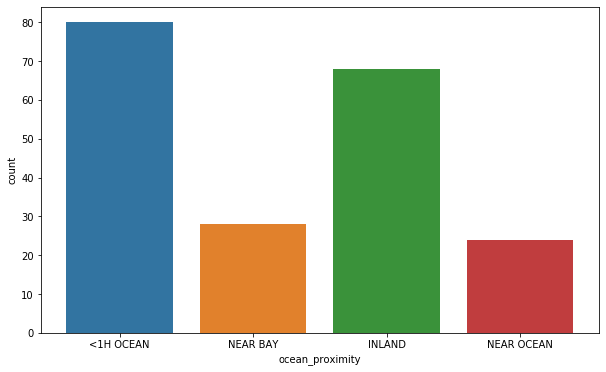

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(data=random_subset,x='ocean_proximity')
plt.plot()

##### Linear regression with most corelated features

In [35]:
x=random_subset.drop('median_house_value',axis=1).values
y=random_subset['median_house_value'].values

In [36]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

##### Feature Selection

In [33]:
# converting ocean_proximity to dummies
random_subset=pd.concat([pd.get_dummies(random_subset['ocean_proximity'],drop_first=True),random_subset],axis=1).drop('ocean_proximity',axis=1)
random_subset['income per working population']=random_subset['median_income']/(random_subset['population']-random_subset['households'])
random_subset['bed per house']=random_subset['total_bedrooms']/random_subset['total_rooms']
random_subset['h/p']=random_subset['households']/random_subset['population']

##### Normalising data

In [37]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
xtrain=ms.fit_transform(xtrain)
xtest=ms.transform(xtest)

In [38]:
def regresssor_model(x,y,estimator):
   
    regressor=estimator()
    regressor.fit(x,y)
    lr_rmse=np.sqrt(mean_squared_error(y,regressor.predict(x)))
    cv_regressor=cross_val_score(cv=10,X=x,y=y,estimator=regressor,scoring='r2')
    print('The cross validated accuracy  - '+str(100*cv_regressor.mean()))
    print('The corss validated variance is - '+str(100*cv_regressor.std()))
    return regressor

def evaluate(ypred,ytest,regressor):
    plt.figure(figsize=(15,8))
    plt.xlabel('(ytest) - (ypred)')
    plt.ylabel('frequency')
    plt.title('residual plot')
    plt.hist(ytest-ypred)
    print("root mean squared error for test data   is "+str(np.sqrt(mean_squared_error(ytest,ypred))))
    plt.show()
# plt.show()


#polynomial regression with all features
def to_poly(degree,xtrain,xtest):
    poly=PolynomialFeatures(degree=degree)
    X=poly.fit_transform(xtrain)
    x=poly.fit_transform(xtest)
    return (X,x)

Linear regression with most co related features
The cross validated accuracy  - -100.54795807125004
The corss validated variance is - 274.7357312296329
root mean squared error for test data   is 98662.18420076197


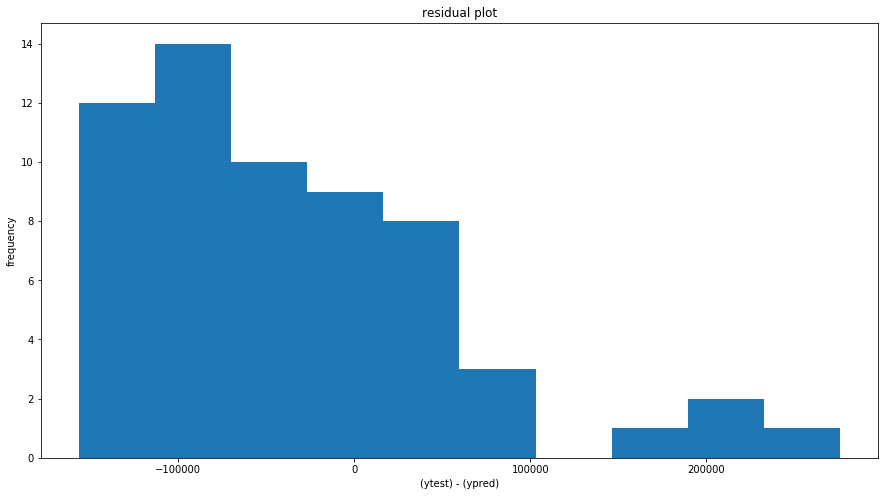

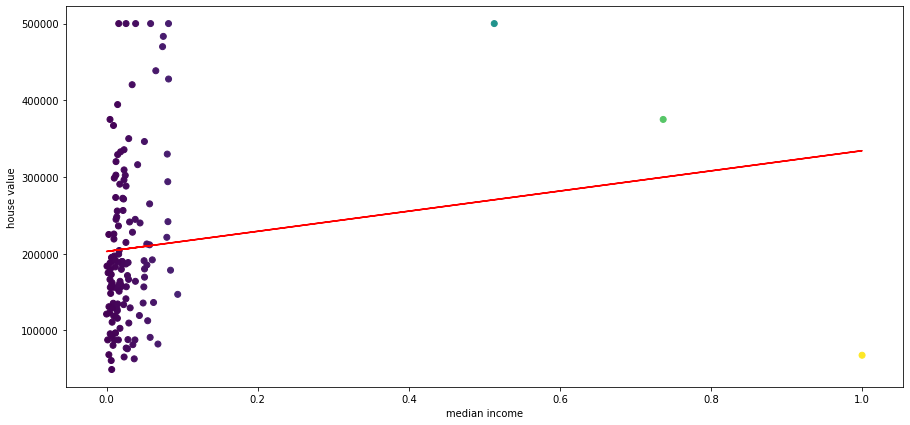

In [39]:
print('Linear regression with most co related features')
l=regresssor_model(xtrain[:,[11]],ytrain,LinearRegression)
evaluate(l.predict(xtest[:,[11]]),ytest,l)
plt.figure(figsize=(15,7))
plt.scatter(xtrain[:,11],ytrain,c=xtrain[:,11])
plt.plot(xtrain[:,11],l.predict(xtrain[:,11:12]),color='red')
plt.xlabel('median income')
plt.ylabel('house value')
plt.show()

##### Compute the squared error between the predicted values and the actual values in each of the two cases.

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=9)
output = imputer.fit_transform(random_subset)
output = pd.DataFrame(out)
output.columns = random_subset.columns
pred = output.loc[random_sample.index]

In [154]:
mse_k = mean_squared_error(random_sample.total_bedrooms,pred.total_bedrooms)
(np.sqrt(mse_k))

140.8520804966931

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(output.drop(columns = ['median_house_value']), output.median_house_value, test_size = 0.2, random_state=5)

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(Y_test,y_pred)

In [ ]:
rmse = (np.sqrt(mse))